<a href="https://colab.research.google.com/github/ribeirolucas962/ANALISE_TEMPERATURA/blob/main/ANALISE_TEMPERATURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

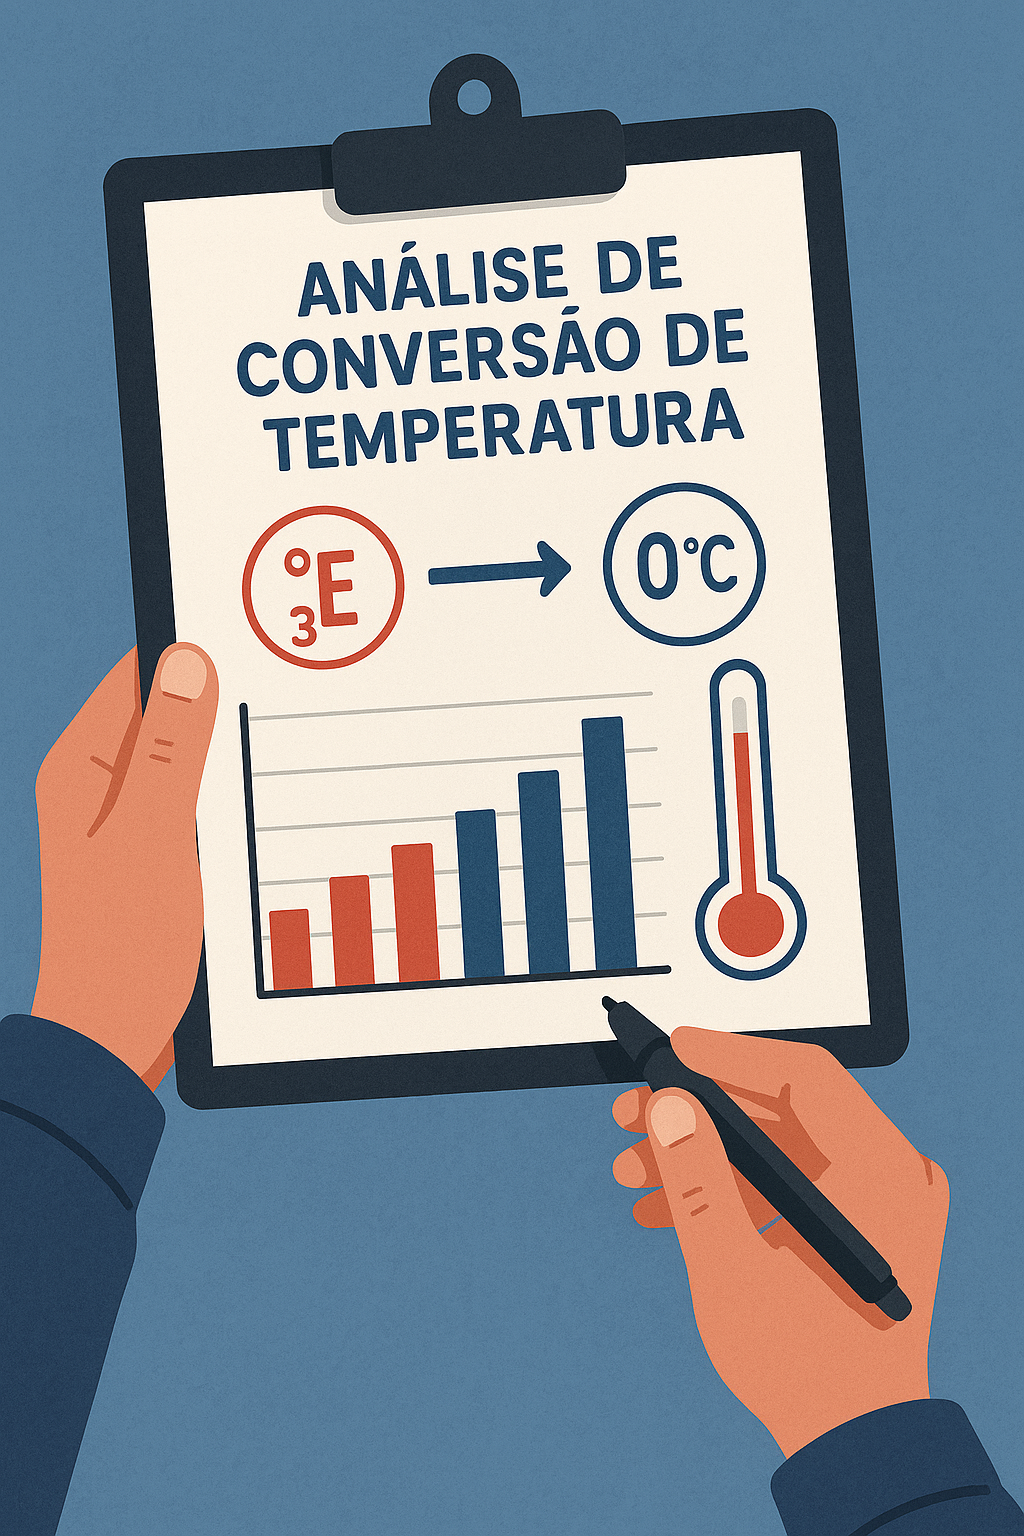

#Implementação de Rede Neural para Conversão de Temperatura
##Conversão de temperatura: Celsius para Fahrenheit com TensorFlow

Autor: Lucas Ribeiro

Data:10/05/2025

##Neste notebook, irei construir um modelo preditivo utilizando redes neurais com o TensorFlow para calcular a conversão de valores de temperatura em Celsius para Fahrenheit.

#Índice
###1-Preparação do Ambiente
###2-Criação do Conjunto de Dados de Treinamento
###3-Criação do Modelo de Rede Neural
###4-Treinamento do Modelo
###5-Visualização das Estatísticas de Treinamento
###6-Análise dos Pesos Aprendidos
###7-Teste do Modelo com Novas Temperaturas
###8-Visualização Gráfica dos Resultados
###9-Visualizando o Erro
###10-Função para Realizar Previsões Interativas
###11-Salvando o Modelo Treinado
###12-Conclusões desse portifólio soliciatado

#1-Preparação do Ambiente

## Importação das bibliotecas necessarias.
##Verificando a versão do TensorFlow e se há GPUs disponíveis
## Definindo um estilo para os gráficos


In [217]:
# importando as bibliotecas necessarias.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [218]:
# verificando a versão do TensorFlow disponivel.
print("TensorFlow versão:", tf.__version__)
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))

TensorFlow versão: 2.18.0
GPUs disponíveis: []


In [219]:
# Definindo um estilo para os Gráficos
plt.style.use('ggplot')

# 2-Criação do Conjunto de Dados de Treinamento
## Os Dados utilizados e fornecidos no roteiro da atividade.
### Dados de treinamento (fornecidos)
### Exibindo os dados de treinamento
###Visualização grafica dos dados


In [220]:
# Dados de trenamento
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100], dtype=float)


In [221]:
# visualização de dados
print("Dados de Treinamento:")
for i in range(len(celsius)):
    print(f"{celsius[i]}°C = {fahrenheit[i]}°F")

Dados de Treinamento:
-40.0°C = -40.0°F
-10.0°C = 14.0°F
0.0°C = 32.0°F
8.0°C = 46.4°F
15.0°C = 59.0°F
22.0°C = 71.6°F
38.0°C = 100.0°F


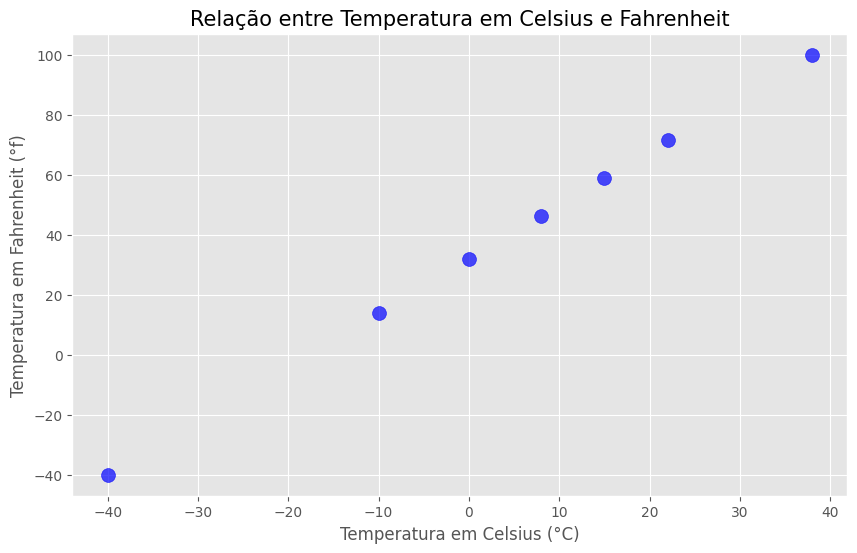

In [222]:
# visualização grafica dos Dados
plt.figure(figsize=(10, 6))
plt.scatter(celsius, fahrenheit, color='blue', s=100, alpha=0.7)
plt.title('Relação entre Temperatura em Celsius e Fahrenheit', fontsize=15)
plt.xlabel('Temperatura em Celsius (°C)', fontsize=12)
plt.ylabel('Temperatura em Fahrenheit (°f)', fontsize=12)
plt.grid(True)
plt.show()

# 3-Criação do Modelo de Rede Neural
### Definição e arquitetura da rede neural
### Compilação do modelo
### Sumário do modelo para visualizar sua arquitetura


In [223]:
# Definindo a arquitetura da rede neural
modelo = keras.Sequential([
    # Camada de entrada: 1 neurônio (pois temos apenas uma feature - temperatura)
    keras.layers.Dense(units=10, input_shape=[1]),

    # Camada oculta com 10 neurônios e função de ativação ReLU
    keras.layers.Dense(units=10, activation='relu'),

    # Camada de saída: 1 neurônio (pois queremos prever um único valor - Fahrenheit)
    keras.layers.Dense(units=1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [224]:
# Compilando o modelo
# Utilizamos o otimizador Adam e a função de perda Mean Squared Error (MSE)
modelo.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)


In [225]:
# Sumário do modelo para visualizar sua arquitetura
print("\nArquitetura do modelo:")
modelo.summary()


Arquitetura do modelo:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

# 4-Treinamento do Modelo
###  Treinando o modelo

In [226]:
# O objeto history armazena as métricas durante o treinamento
history = modelo.fit(
    celsius,           # Dados de entrada (X)
    fahrenheit,        # Dados de saída (y)
    epochs=500,        # Número de ciclos de treinamento
    verbose=1          # Mostrar logs durante o treinamento (1 = detalhado, 0 = sem logs)
)

print("Treinamento concluído!")

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3649.9949
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1889.1932
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 629.9257
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1046.0261
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 802.2468
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 319.1015
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 476.3650
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 687.7886
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 633.2331
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 438.0748
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 324.2470
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 402.8948
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 481.5446
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 380.4873
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - los

# 5-Visualização das Estatísticas de Treinamento
## Vamos visualizar o histórico de treinamento para entender como o modelo evoluiu.
### Obtendo o histórico de perda (loss) durante o treinamento
### Criando o gráfico com as estatísticas de treinamento
### Avaliando o modelo com os dados de treinamento


In [227]:
# Obtendo o histórico de perda (loss) durante o treinamento
historico_perda = history.history['loss']

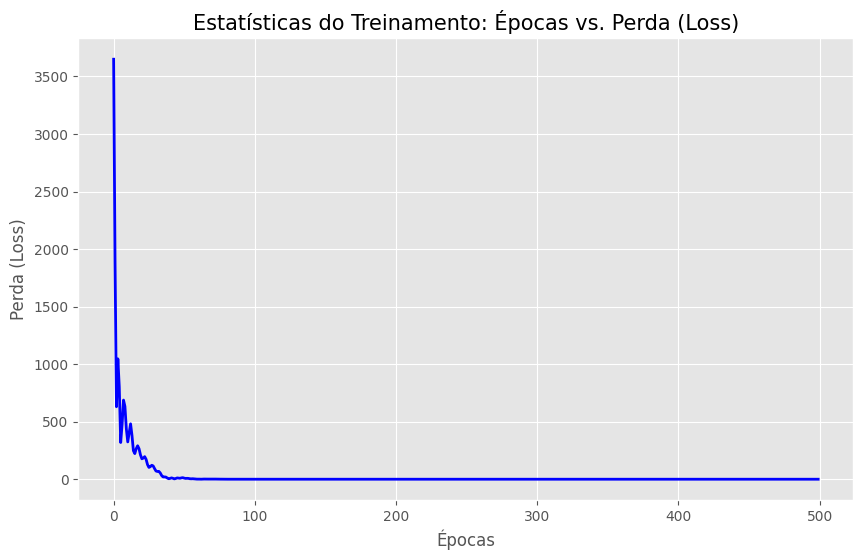

In [228]:
# Criando o gráfico com as estatísticas de treinamento
plt.figure(figsize=(10, 6))
plt.plot(range(len(historico_perda)), historico_perda,'b', linewidth=2 )
plt.title('Estatísticas do Treinamento: Épocas vs. Perda (Loss)', fontsize=15)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Perda (Loss)', fontsize=12)
plt.grid(True)
plt.show()

In [229]:
#Avaliando o modelo com os dados de treinamento
resultado = modelo.evaluate(celsius, fahrenheit, verbose=0)
print(f"\nPerda (MSE) final nos dados de treinamento: {resultado:.6f}")


Perda (MSE) final nos dados de treinamento: 0.008372


# 6-Análise dos Pesos Aprendidos
### Recuperando os pesos e bias aprendidos pelo modelo
### Extraindo pesos e bias da última camada para análise
### ver se os pesos se aproximam dos valores da fórmula F = C*1.8 + 32

In [230]:
# Recuperando os pesos e bias aprendidos pelo modelo
layer1 = modelo.layers[0]
layer2 = modelo.layers[1]
layer3 = modelo.layers[2]

In [231]:
# Extraindo pesos e bias da última camada para análise
weights = layer3.get_weights()[0]
bias = layer3.get_weights()[1]

In [232]:
print("\nAnálise dos pesos aprendidos pela camada de saída:")
print(f"Pesos: {weights}")
print(f"Bias: {bias}")


Análise dos pesos aprendidos pela camada de saída:
Pesos: [[ 0.13034569]
 [-0.7505254 ]
 [ 0.03941995]
 [-0.09808927]
 [ 0.41213953]
 [ 0.82699144]
 [ 0.22801653]
 [ 0.6607849 ]
 [-0.8542632 ]
 [ 0.06067674]]
Bias: [2.4021559]


In [233]:
# ver se os pesos se aproximam dos valores da fórmula F = C*1.8 + 32
print("\nComparação com a fórmula real:")
print(f"Coeficiente esperado (1.8): {weights.mean():.4f}")
print(f"Bias esperado (32): {bias[0]:.4f}")


Comparação com a fórmula real:
Coeficiente esperado (1.8): 0.0655
Bias esperado (32): 2.4022


# 7-Teste do Modelo com Novas Temperaturas
###Criando 10 temperaturas em Celsius para teste (diferentes das de treinamento)
### Calculando as previsões do modelo para esses valores
### Calculando os valores reais usando a fórmula padrão
### Calculando o erro absoluto e percentual
### Criando e exibindo uma tabela comparativa
### Calculando as médias dos erros

In [234]:
# Criando 10 temperaturas em Celsius para teste
celsius_teste = np.array([-30, -20, 5, 10, 20, 25, 30, 35, 40, 45], dtype=float)

In [235]:
# Calculando as previsões do modelo para esses valores
previsoes = modelo.predict(celsius_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [236]:
# Calculando os valores reais usando a fórmula padrão
valor_real = celsius_teste * 1.8 + 32

In [237]:
# Calculando o erro absoluto e percentual
erro_absoluto = np.abs(previsoes.flatten() - valor_real)
erro_percentual = (erro_absoluto / np.abs(valor_real)) * 100

In [238]:
# Criando e exibindo uma tabela comparativa
dados_tabela = {
    'Celsius': celsius_teste,
    'Previsão (Fahrenheit)': previsoes.flatten(),
    'Valor Real (Fahrenheit)': valor_real,
    'Erro Absoluto': erro_absoluto,
    'Erro Percentual (%)': erro_percentual
}

df_comparacao = pd.DataFrame(dados_tabela)
pd.set_option('display.precision', 4)
print("\nTabela Comparativa:")
print(df_comparacao)


Tabela Comparativa:
   Celsius  Previsão (Fahrenheit)  Valor Real (Fahrenheit)  Erro Absoluto  \
0    -30.0               -23.6454                    -22.0         1.6454   
1    -20.0                -6.4209                     -4.0         2.4209   
2      5.0                40.9852                     41.0         0.0148   
3     10.0                49.9490                     50.0         0.0510   
4     20.0                67.8767                     68.0         0.1233   
5     25.0                76.8405                     77.0         0.1595   
6     30.0                85.8044                     86.0         0.1956   
7     35.0                94.7682                     95.0         0.2318   
8     40.0               103.7320                    104.0         0.2680   
9     45.0               112.6959                    113.0         0.3041   

   Erro Percentual (%)  
0               7.4792  
1              60.5236  
2               0.0362  
3               0.1020  
4     

In [239]:
# Calculando as médias dos erros
media_erro_absoluto = np.mean(erro_absoluto)
media_erro_percentual = np.mean(erro_percentual)
print(f"\nMédia do Erro Absoluto: {media_erro_absoluto:.4f}")
print(f"Média do Erro Percentual: {media_erro_percentual:.4f}%")


Média do Erro Absoluto: 0.5415
Média do Erro Percentual: 6.9528%


# 8-Visualização Gráfica dos Resultados
### Plotando uma curva contínua do modelo vs. valores reais
### Criando um range de temperaturas para uma curva suave
### Plotando a curva real
### Plotando a curva do modelo
###Plotando os pontos de treinamento
### Plotando os pontos de teste
# 8-Visualização Gráfica dos Resultados


In [240]:
# Plotando uma curva contínua do modelo vs. valores reais
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [241]:
# Criando um range de temperaturas para uma curva suave
celsius_range = np.linspace(-50, 50, 100)
previsoes_range = modelo.predict(celsius_range).flatten()
valor_real_range = celsius_range * 1.8 + 32

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


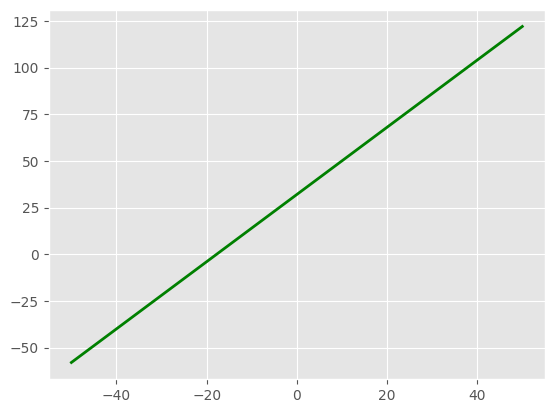

In [242]:
# Plotando a curva real
plt.plot(celsius_range, valor_real_range, 'g-', linewidth=2, label='Curva Real (F= c*1.8 + 32)')
plt.show()

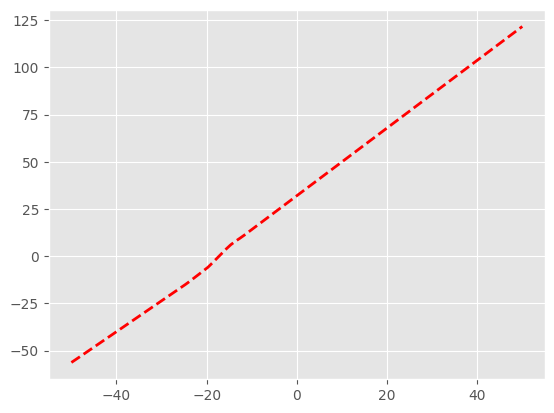

In [243]:
# Plotando a curva do modelo
plt.plot(celsius_range, previsoes_range, 'r--', linewidth=2, label='Previsão do Modelo')
plt.show()

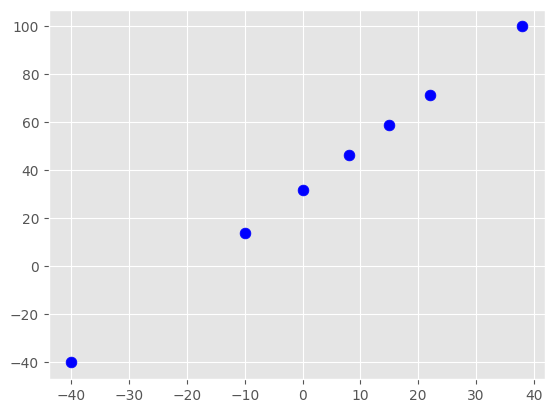

In [244]:
# Plotando os pontos de treinamento
plt.scatter(celsius, fahrenheit, color='blue', s=60, label='Dados de Treinamento')
plt.show()

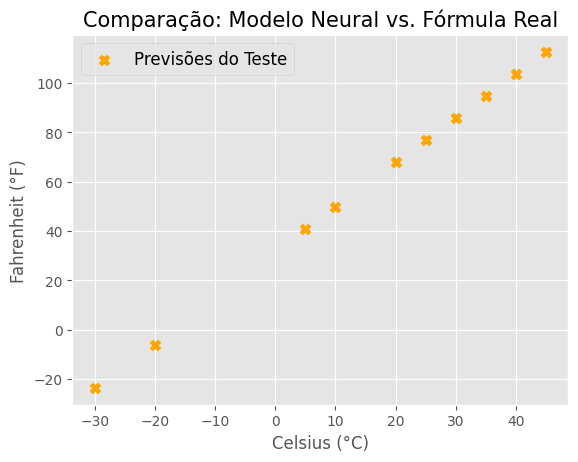

In [245]:
# Plotando os pontos de teste
plt.scatter(celsius_teste, previsoes.flatten(), color='orange', marker='X', s=60, label='Previsões do Teste')
plt.title('Comparação: Modelo Neural vs. Fórmula Real', fontsize=15)
plt.xlabel('Celsius (°C)', fontsize=12)
plt.ylabel('Fahrenheit (°F)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


# 9-Visualizando o Erro
###Visualizando o erro em função da temperatura
###Calculando o erro para cada ponto do range
###Plotando o erro
###Histograma do erro

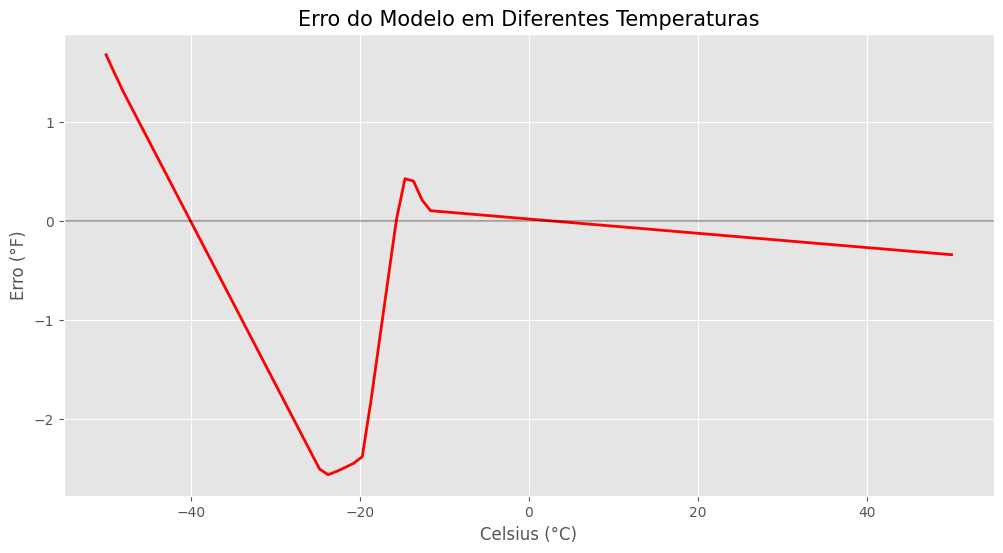

In [246]:
# Visualizando o erro em função da temperatura
plt.figure(figsize=(12, 6))
erro_range= previsoes_range - valor_real_range

# Plotando o erro
plt.plot(celsius_range, erro_range, 'r-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Erro do Modelo em Diferentes Temperaturas', fontsize=15)
plt.xlabel('Celsius (°C)', fontsize=12)
plt.ylabel('Erro (°F)', fontsize=12)
plt.grid(True)
plt.show()

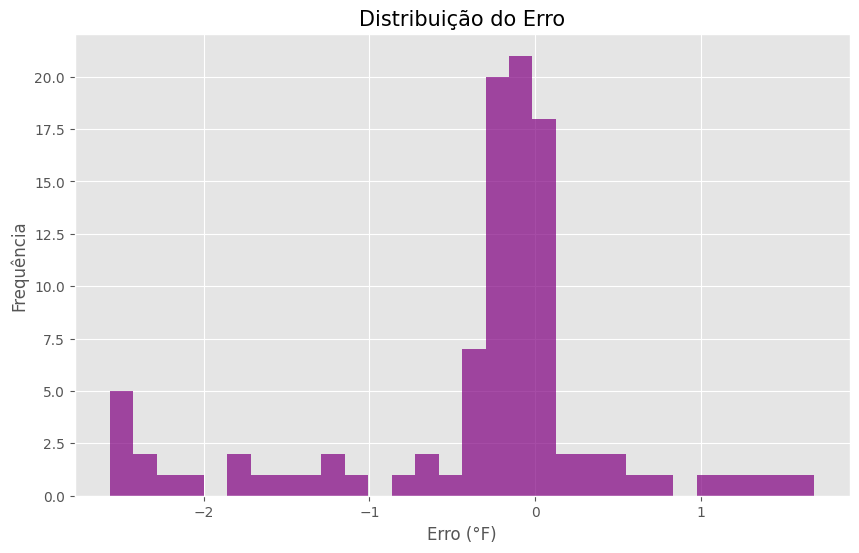

In [247]:
# Histograma do erro
plt.figure(figsize=(10, 6))
plt.hist(erro_range, bins=30, alpha=0.7, color='purple')
plt.title('Distribuição do Erro', fontsize=15)
plt.xlabel('Erro (°F)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()

# 10-Função para Realizar Previsões Interativas
###Função para prever interativamente
###Exemplo de uso (você pode alterar o valor)

In [248]:
def prever_temperatura(temp_celsius):
    """Prevê a temperatura em Fahrenheit usando o modelo treinado."""
    temp_celsius = float(temp_celsius)
    previsao = modelo.predict(np.array([temp_celsius]))[0][0]
    valor_real = temp_celsius * 1.8 + 32
    erro = abs(previsao - valor_real)

    print(f"\nTemperatura em Celsius: {temp_celsius}°C")
    print(f"Previsão do modelo (Fahrenheit): {previsao:.4f}°F")
    print(f"Valor real (Fahrenheit): {valor_real:.4f}°F")
    print(f"Erro absoluto: {erro:.4f}°F")
    print(f"Erro percentual: {(erro/abs(valor_real))*100:.4f}%")

    return previsao

# Exemplo de uso (você pode alterar o valor)
prever_temperatura(42)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Temperatura em Celsius: 42.0°C
Previsão do modelo (Fahrenheit): 107.3176°F
Valor real (Fahrenheit): 107.6000°F
Erro absoluto: 0.2824°F
Erro percentual: 0.2625%


np.float32(107.31758)

# 11-Salvando o Modelo Treinado
###Salvando o modelo

In [249]:
modelo.save('modelo_temperatura.h5')
print("\modelo salvo com sucesso!")

\modelo salvo com sucesso!


# 12-Conclusões desse portefólio soliciatado.
###Neste notebook, construi um modelo de rede neural simples que aprendeu a relação entre as temperaturas em Celsius e Fahrenheit.
###O modelo foi capaz de descobrir, por conta própria, a relação matemática F = C*1.8 + 32 apenas observando os exemplos fornecidos. Isto demonstra o poder do aprendizado de máquina, em vez de programarmos explicitamente uma solução, fornecemos dados de exemplo e permitimos que o algoritmo descubra o padrão subjacente.
###Embora este seja um exemplo relativamente simples com uma relação linear, o mesmo princípio se aplica a problemas muito mais complexos onde as relações não são tão óbvias ou fáceis de modelar com equações tradicionais.
##Observações Importantes
###A rede neural conseguiu aproximar muito bem a fórmula de conversão, com um erro percentual médio muito baixo.
###Os pesos e bias aprendidos pelo modelo se aproximaram dos coeficientes da fórmula real (1.8 e 32).
###O modelo generalizou bem para valores fora do conjunto de treinamento.
###A curva de aprendizado mostrou uma rápida convergência, indicando que o modelo encontrou facilmente a solução ótima.


